In [266]:
import glob
from torch.utils.data import Dataset, DataLoader
import torch
import os
from PIL import Image
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
from torchvision import  models, transforms
import matplotlib.pyplot as plt
import time
import copy

In [267]:
class_names="b1,b2,b3,g1,g2,g3,g4,g5".split(",")
class_names

['b1', 'b2', 'b3', 'g1', 'g2', 'g3', 'g4', 'g5']

In [268]:
spath=r"/kaggle/input/picforkaggleme"##70k

files=glob.glob(os.path.join(spath,"*/*.*"))
files=[x for x in files if "_b" in x or "_g" in x]
files=[x for x in files if "_day" in x ]
files[:11]

['/kaggle/input/picforkaggleme/picforkaggle/002050_b2_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/601225_b1_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/603958_b2_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/600237_b3_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/301058_g4_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/603269_g4_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/300600_g2_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/603808_b3_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/301006_g1_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/002472_g1_day.jpg',
 '/kaggle/input/picforkaggleme/picforkaggle/002736_b3_day.jpg']

In [269]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
#     transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std),
])

valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std),
])

In [270]:
def collect_dictionary(obj):
  inv_obj = {}
  for key, value in obj.items():
    inv_obj.setdefault(value, list()).append(key)
  return inv_obj

In [271]:
lbl2num={"b1":1,"b2":2,"b3":3,"g1":4,"g2":5,"g3":6,"g4":7,"g5":8}
numtolbl=collect_dictionary(lbl2num)
numtolbl,lbl2num

({1: ['b1'],
  2: ['b2'],
  3: ['b3'],
  4: ['g1'],
  5: ['g2'],
  6: ['g3'],
  7: ['g4'],
  8: ['g5']},
 {'b1': 1, 'b2': 2, 'b3': 3, 'g1': 4, 'g2': 5, 'g3': 6, 'g4': 7, 'g5': 8})

In [272]:
lbl2num["b1"]

1

In [273]:
class MyDataset(Dataset):
    def __init__(self,spathpic,transform=None):
        self.x = donepic_(spathpic)
        self.y = donepic_lbl(self.x)
        self.len = len(self.x)
        self.transform = transform
        
    def __getitem__(self, index):
        img=self.x[index]## picture filename
        img = Image.open(img).convert('RGB')     # 0~255
        if self.transform is not None:
            img = self.transform(img) 
            
        return img, lbl2num[self.y[index]]

    def __len__(self):
        return self.len

    def donepic_(spathpic):
        files=glob.glob(os.path.join(spath,"*/*.*"))
        files=[x for x in files if "_b" in x or "_g" in x]
        files=[x for x in files if "_day" in x ]
        return files

    def donepic_lbl(xlist):
        lbllist=[x.split("_")[1] for x in xlist]
        return lbllist

In [274]:
# TRAIN_transforms= transforms.Compose([
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#     ])
# train_transform

In [275]:
ds_=MyDataset(spath,transform=train_transform)

train_ds = DataLoader(dataset=ds_, batch_size=125, shuffle=False)
train_ds

In [276]:
# TRAIN = 'train'
# VAL = 'val'
# TEST = 'test'

# # VGG-16 Takes 224x224 images as input, so we resize all of them
# data_transforms = {
#     TRAIN: transforms.Compose([
#         # Data augmentation is a good practice for the train set
#         # Here, we randomly crop the image to 224x224 and
#         # randomly flip it horizontally. 
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#     ]),
#     VAL: transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#     ]),
#     TEST: transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#     ])
# }

In [286]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))## rgb change
    plt.figure(figsize=(56, 56))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[x for x in classes])
#     imshow(out, title=[numtolbl[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(train_ds))

In [287]:
# inputs, classes
class_names

['b1', 'b2', 'b3', 'g1', 'g2', 'g3', 'g4', 'g5']

In [288]:
# numtolbl,lbl2num

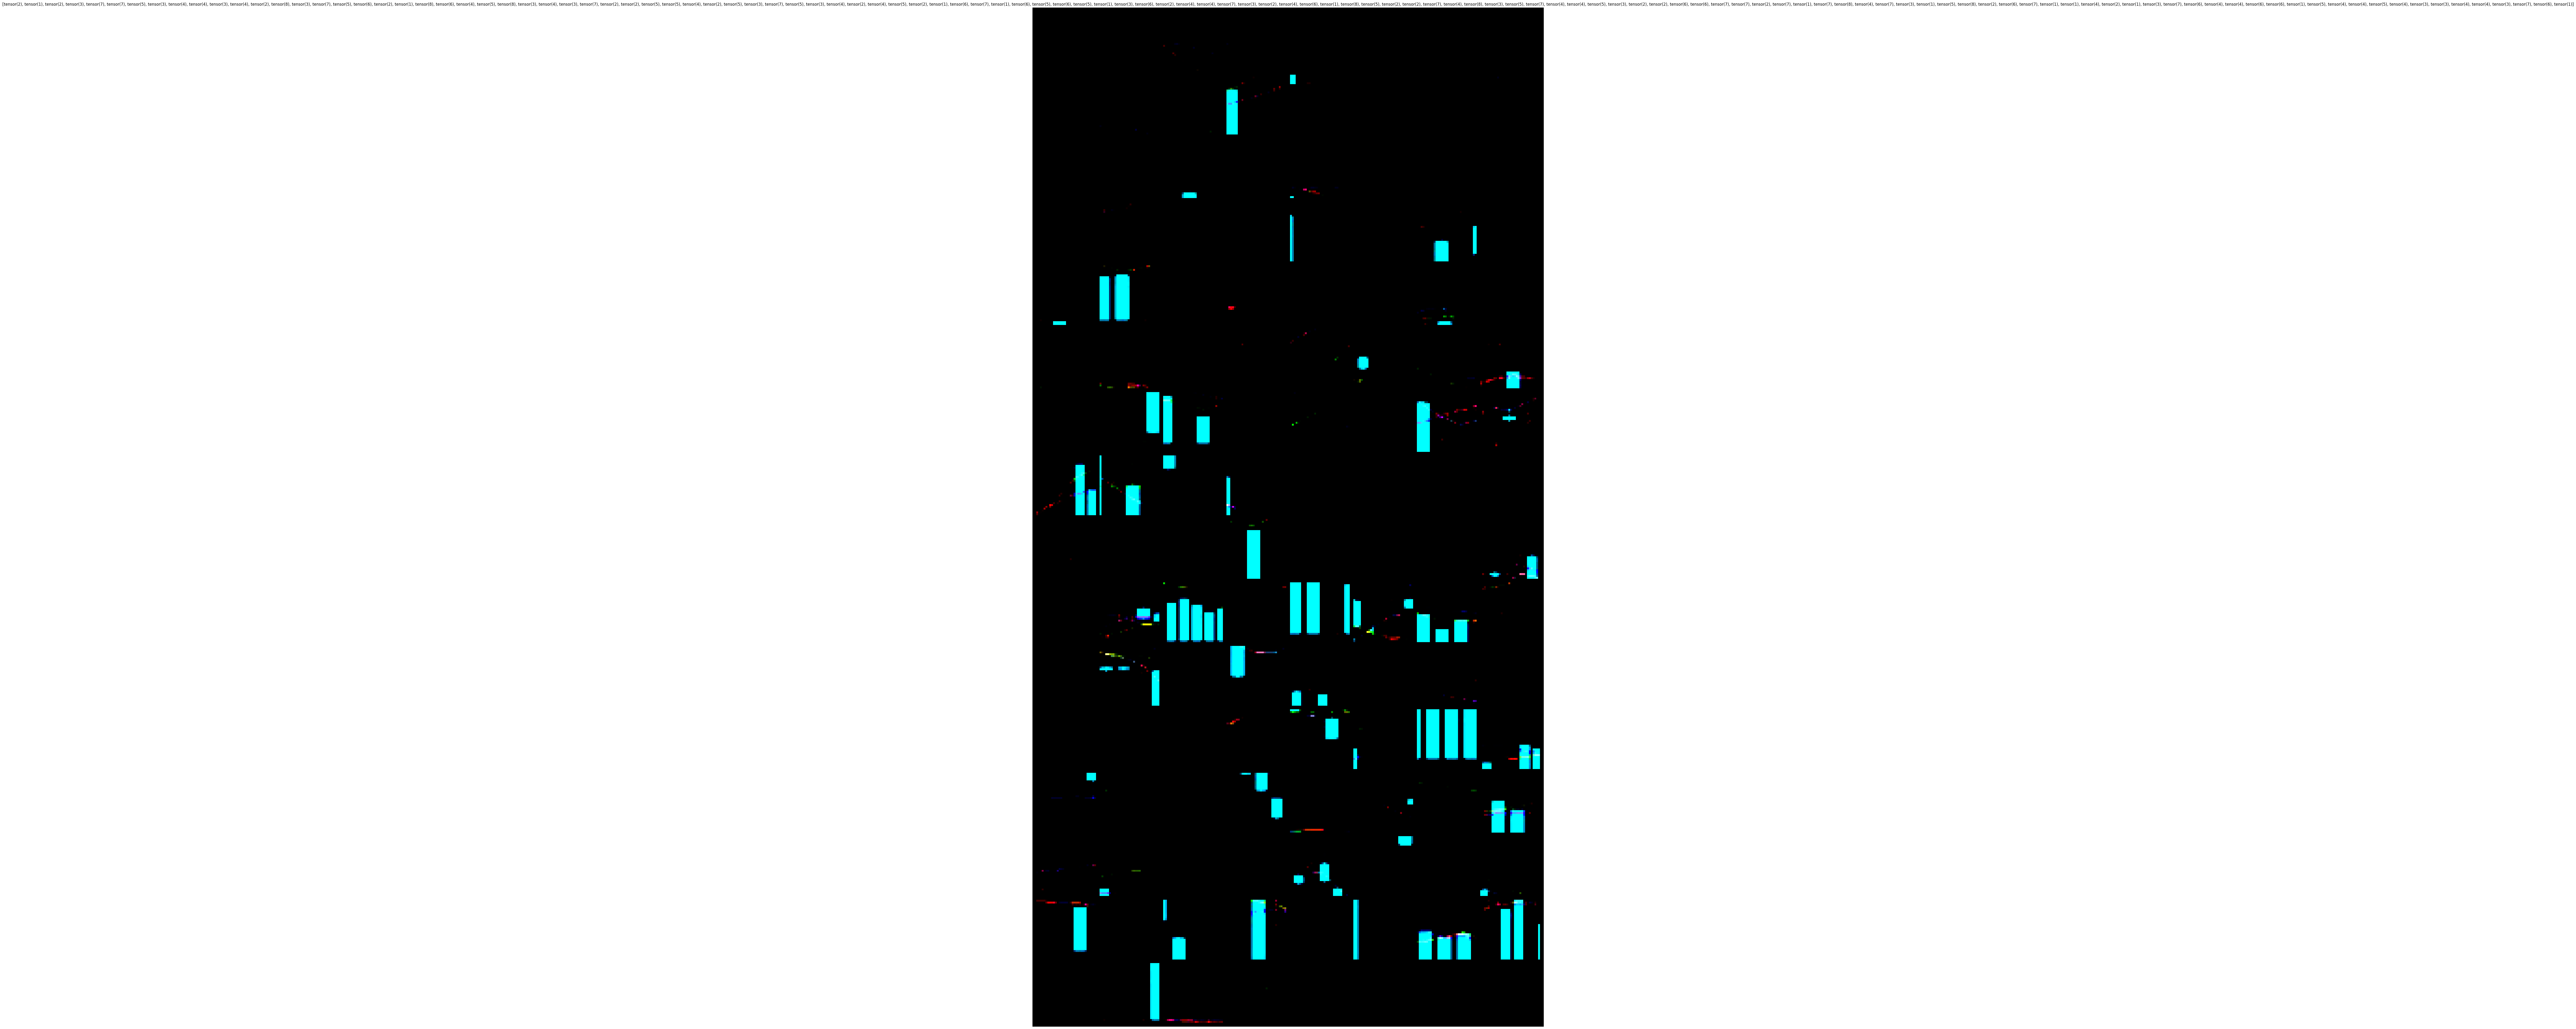

In [289]:
# inputs=list(inputs)
# classes=list(classes)
show_databatch(inputs, classes)

In [281]:
# # next(iter(train_ds))
# import numpy as np
# inputs, classes = next(iter(train_ds))
# inputs=np.array(inputs)
# classes=np.array(classes)
# # inputs, classes